=== Creando grafo desde lista de conexiones ===


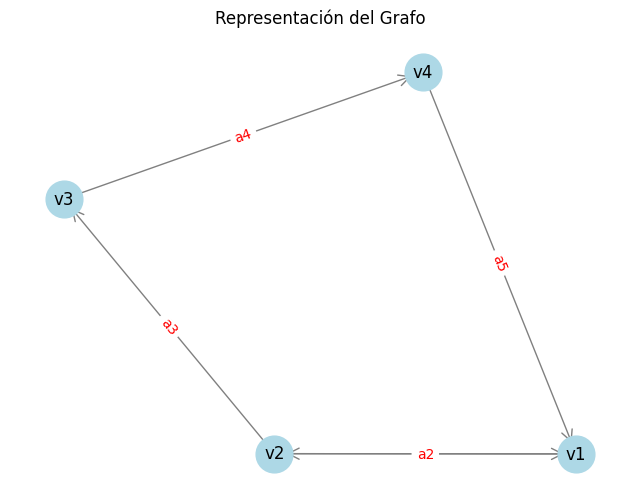


Matriz de adyacencia generada desde el grafo:
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
[['v1' 'v2' 'a1']
 ['v2' 'v1' 'a2']
 ['v2' 'v3' 'a3']
 ['v3' 'v4' 'a4']
 ['v4' 'v1' 'a5']]


In [ ]:
# Instalar bibliotecas si es necesario
#!pip install networkx matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Datos proporcionados
conexiones = [
    ('v1', 'v2', 'a1'),
    ('v2', 'v1', 'a2'),
    ('v2', 'v3', 'a3'),
    ('v3', 'v4', 'a4'),
    ('v4', 'v1', 'a5')
]

matriz_adyacencia = [
    [0, 1, 0, 0],  # v1
    [1, 0, 1, 0],  # v2
    [0, 0, 0, 1],  # v3
    [1, 0, 0, 0]   # v4
]

nodos = ['v1', 'v2', 'v3', 'v4']

# 1. Crear grafo a partir de la lista de conexiones
def crear_grafo_desde_conexiones(conexiones, nodos):
    G = nx.DiGraph()
    G.add_nodes_from(nodos)
    for origen, destino, etiqueta in conexiones:
        G.add_edge(origen, destino, label=etiqueta)
    return G

# 2. Crear matriz de adyacencia desde el grafo
def crear_matriz_adyacencia(G, nodos):
    matriz = np.zeros((len(nodos), len(nodos)), dtype=int)
    nodo_indices = {nodo: i for i, nodo in enumerate(nodos)}

    for origen, destino in G.edges():
        i = nodo_indices[origen]
        j = nodo_indices[destino]
        matriz[i][j] = 1
    return matriz

# 3. Crear grafo desde matriz de adyacencia
def crear_grafo_desde_matriz(matriz, nodos):
    G = nx.DiGraph()
    G.add_nodes_from(nodos)

    for i, origen in enumerate(nodos):
        for j, destino in enumerate(nodos):
            if matriz[i][j] == 1:
                # Buscar la etiqueta correspondiente
                etiqueta = f"a{len(G.edges)+1}"
                G.add_edge(origen, destino, label=etiqueta)
    return G

# 4. Visualización del grafo
def dibujar_grafo(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray',
                         arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=12)

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Representación del Grafo")
    plt.axis('off')
    plt.show()

# Ejecución y demostración
print("=== Creando grafo desde lista de conexiones ===")
G_desde_conexiones = crear_grafo_desde_conexiones(conexiones, nodos)
dibujar_grafo(G_desde_conexiones)

print("\nMatriz de adyacencia generada desde el grafo:")
matriz_generada = crear_matriz_adyacencia(G_desde_conexiones, nodos)
print(np.array(matriz_generada))
print(np.array(conexiones))

=== Creando grafo desde lista de conexiones ===


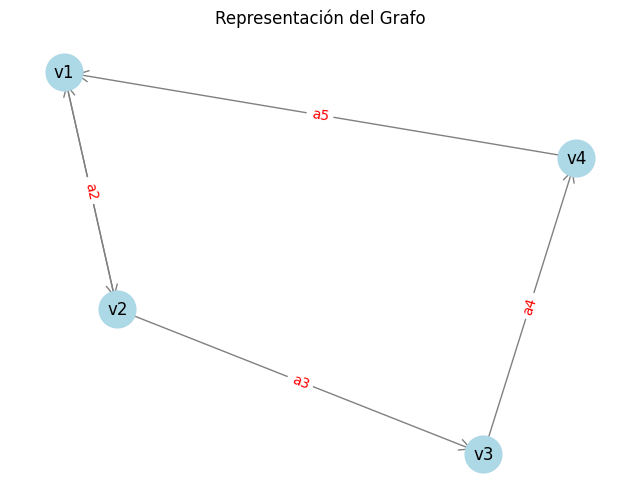


Matriz de adyacencia generada desde el grafo:
    v1  v2  v3  v4
v1   0   1   0   0
v2   1   0   1   0
v3   0   0   0   1
v4   1   0   0   0


In [ ]:
# Instalar bibliotecas si es necesario
#!pip install networkx matplotlib numpy pandas

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Datos proporcionados
conexiones = [
    ('v1', 'v2', 'a1'),
    ('v2', 'v1', 'a2'),
    ('v2', 'v3', 'a3'),
    ('v3', 'v4', 'a4'),
    ('v4', 'v1', 'a5')
]

matriz_adyacencia = [
    [0, 1, 0, 0],  # v1
    [1, 0, 1, 0],  # v2
    [0, 0, 0, 1],  # v3
    [1, 0, 0, 0]   # v4
]

nodos = ['v1', 'v2', 'v3', 'v4']

# 1. Crear grafo a partir de la lista de conexiones
def crear_grafo_desde_conexiones(conexiones, nodos):
    G = nx.DiGraph()
    G.add_nodes_from(nodos)
    for origen, destino, etiqueta in conexiones:
        G.add_edge(origen, destino, label=etiqueta)
    return G

# 2. Crear matriz de adyacencia desde el grafo (como DataFrame)
def crear_matriz_adyacencia(G, nodos):
    matriz = np.zeros((len(nodos), len(nodos)), dtype=int)
    nodo_indices = {nodo: i for i, nodo in enumerate(nodos)}

    for origen, destino in G.edges():
        i = nodo_indices[origen]
        j = nodo_indices[destino]
        matriz[i][j] = 1

    # Convertir a DataFrame
    df_matriz = pd.DataFrame(matriz, index=nodos, columns=nodos)
    return df_matriz

# 3. Crear grafo desde matriz de adyacencia
def crear_grafo_desde_matriz(df_matriz, nodos):
    G = nx.DiGraph()
    G.add_nodes_from(nodos)

    for i, origen in enumerate(nodos):
        for j, destino in enumerate(nodos):
            if df_matriz.iloc[i, j] == 1:
                # Buscar la etiqueta correspondiente
                etiqueta = f"a{len(G.edges)+1}"
                G.add_edge(origen, destino, label=etiqueta)
    return G

# 4. Visualización del grafo
def dibujar_grafo(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray',
                         arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=12)

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Representación del Grafo")
    plt.axis('off')
    plt.show()

# Ejecución y demostración
print("=== Creando grafo desde lista de conexiones ===")
G_desde_conexiones = crear_grafo_desde_conexiones(conexiones, nodos)
dibujar_grafo(G_desde_conexiones)

print("\nMatriz de adyacencia generada desde el grafo:")
matriz_generada = crear_matriz_adyacencia(G_desde_conexiones, nodos)
print(matriz_generada)

In [ ]:
def crear_matriz_alcanzabilidad(df_matriz_adyacencia):
    """
    Crea la matriz de alcanzabilidad usando el algoritmo de Floyd-Warshall
    """
    n = len(df_matriz_adyacencia)
    # Crear copia de la matriz de adyacencia
    alcanzabilidad = df_matriz_adyacencia.copy()

    # Algoritmo de Floyd-Warshall para alcanzabilidad
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if alcanzabilidad.iloc[i, k] == 1 and alcanzabilidad.iloc[k, j] == 1:
                    alcanzabilidad.iloc[i, j] = 1

    return alcanzabilidad

print("\nMatriz de alcanzabilidad:")
matriz_alcanzabilidad = crear_matriz_alcanzabilidad(matriz_generada)
print(matriz_alcanzabilidad)


Matriz de alcanzabilidad:
    v1  v2  v3  v4
v1   1   1   1   1
v2   1   1   1   1
v3   1   1   1   1
v4   1   1   1   1


In [ ]:
# 5. Crear matriz de distancias
def crear_matriz_distancias(df_matriz_adyacencia):
    """
    Crea la matriz de distancias usando el algoritmo de Floyd-Warshall
    """
    n = len(df_matriz_adyacencia)
    nodos = df_matriz_adyacencia.index.tolist()

    # Inicializar matriz de distancias
    distancias = np.full((n, n), np.inf)

    # Distancia de un nodo a sí mismo es 0
    for i in range(n):
        distancias[i][i] = 0

    # Si hay conexión directa, la distancia es 1
    for i in range(n):
        for j in range(n):
            if df_matriz_adyacencia.iloc[i, j] == 1:
                distancias[i][j] = 1

    # Algoritmo de Floyd-Warshall para encontrar distancias mínimas
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if distancias[i][k] + distancias[k][j] < distancias[i][j]:
                    distancias[i][j] = distancias[i][k] + distancias[k][j]

    # Convertir infinitos a -1 o un valor indicativo
    distancias = np.where(distancias == np.inf, -1, distancias).astype(int)

    # Crear DataFrame
    df_distancias = pd.DataFrame(distancias, index=nodos, columns=nodos)
    return df_distancias


print("\nMatriz de distancias:")
matriz_distancias = crear_matriz_distancias(matriz_generada)
print(matriz_distancias)



Matriz de distancias:
    v1  v2  v3  v4
v1   0   1   2   3
v2   1   0   1   2
v3   2   3   0   1
v4   1   2   3   0


In [ ]:
def imprimir_matriz_especificaciones(conexiones):
   """
   Imprime la matriz de especificaciones (recorridos) en formato de tabla
   """
   # Crear DataFrame desde las conexiones
   df_especificaciones = pd.DataFrame(conexiones, columns=['Origen', 'Destino', 'Conexion'])

   print("\nMatriz de Especificaciones (recorridos)")
   print("="*40)
   print(df_especificaciones.to_string(index=False))
   print("="*40)

# Agregar en la sección de ejecución:
imprimir_matriz_especificaciones(conexiones)


Matriz de Especificaciones (recorridos)
Origen Destino Conexion
    v1      v2       a1
    v2      v1       a2
    v2      v3       a3
    v3      v4       a4
    v4      v1       a5


# Ejercicios en clase/casa (Consultar y Desarrollar):

 0. Qué es teoría de grafos (dar ejemplos de grafos), cuáles son los tipos de grafos (grafo no dirigido, grafo dirigido), y las características de los grafos: adyacencia (A), incidencia (consultar la matriz de incidencia I), grado de un vértice (consultar la ley "hand shaking"), trayectoria.
 1. Definiciones de las matrices A, R y dij
 2. Cómo hacer la multiplicación entre dos matrices manualmente
    
    (***Ayuda: recordar el producto punto entre filas de la primera matriz y columnas de la segunda matriz***)

 3. Algoritmo de Dijkstra
 4. Algoritmo de Yen
 5. Inventarse dos grafos y hacer todo el análisis a ambos
 6. Hacer todo el análisis del grafo de Euler

#Punto 2 - Multiplicacion entre matrices manual y automatizada

In [ ]:
A = np.array(matriz_generada)
print("t = 1")
print(A)
print("**********************")

print("t = 2")
A2 = A @ A
print(A2)
print("**********************")

print("t = 3")
A3 = A @ A2
print(A3)
print("**********************")

print("t = 4")
A4 = A @ A3
print(A4)
print("**********************")

print("t = 5")
A5 = A @ A4
print(A5)
print("**********************")

print("t = 6")
A6 = A @ A5
print(A6)
print("**********************")

print("t = 7")
A7 = A @ A6
print(A7)
print("**********************")

print("t = 8")
A8 = A @ A7
print(A8)
print("**********************")

print("t = 9")
A9 = A @ A8
print(A9)
print("**********************")

print("t = 10")
A10 = A @ A9
print(A10)
print("**********************")

t = 1
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
**********************
t = 2
[[1 0 1 0]
 [0 1 0 1]
 [1 0 0 0]
 [0 1 0 0]]
**********************
t = 3
[[0 1 0 1]
 [2 0 1 0]
 [0 1 0 0]
 [1 0 1 0]]
**********************
t = 4
[[2 0 1 0]
 [0 2 0 1]
 [1 0 1 0]
 [0 1 0 1]]
**********************
t = 5
[[0 2 0 1]
 [3 0 2 0]
 [0 1 0 1]
 [2 0 1 0]]
**********************
t = 6
[[3 0 2 0]
 [0 3 0 2]
 [2 0 1 0]
 [0 2 0 1]]
**********************
t = 7
[[0 3 0 2]
 [5 0 3 0]
 [0 2 0 1]
 [3 0 2 0]]
**********************
t = 8
[[5 0 3 0]
 [0 5 0 3]
 [3 0 2 0]
 [0 3 0 2]]
**********************
t = 9
[[0 5 0 3]
 [8 0 5 0]
 [0 3 0 2]
 [5 0 3 0]]
**********************
t = 10
[[8 0 5 0]
 [0 8 0 5]
 [5 0 3 0]
 [0 5 0 3]]
**********************


In [ ]:
def potencia_matriz(A, t):
    print(f"t = 1")
    print(A)
    print("**********************")

    resultado = A.copy()
    for i in range(2, t + 1):
        resultado = resultado @ A
        print(f"t = {i}")
        print(resultado)
        print("**********************")

    return resultado
t=10
resultado = potencia_matriz(A, t)

t = 1
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
**********************
t = 2
[[1 0 1 0]
 [0 1 0 1]
 [1 0 0 0]
 [0 1 0 0]]
**********************
t = 3
[[0 1 0 1]
 [2 0 1 0]
 [0 1 0 0]
 [1 0 1 0]]
**********************
t = 4
[[2 0 1 0]
 [0 2 0 1]
 [1 0 1 0]
 [0 1 0 1]]
**********************
t = 5
[[0 2 0 1]
 [3 0 2 0]
 [0 1 0 1]
 [2 0 1 0]]
**********************
t = 6
[[3 0 2 0]
 [0 3 0 2]
 [2 0 1 0]
 [0 2 0 1]]
**********************
t = 7
[[0 3 0 2]
 [5 0 3 0]
 [0 2 0 1]
 [3 0 2 0]]
**********************
t = 8
[[5 0 3 0]
 [0 5 0 3]
 [3 0 2 0]
 [0 3 0 2]]
**********************
t = 9
[[0 5 0 3]
 [8 0 5 0]
 [0 3 0 2]
 [5 0 3 0]]
**********************
t = 10
[[8 0 5 0]
 [0 8 0 5]
 [5 0 3 0]
 [0 5 0 3]]
**********************
